Programmer: Colleen Lemak  
Class: CPSC222, Fall 2021  
Data Assignment #6  
Date: 11/17/21  
I did not attempt the bonus activity.  
Description: This program uses Jupyter Notebook to execute various hypothesis testing tasks.

In [231]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import json
import requests

### SciPy Hypothesis Testing Exercises

* In this Jupyter Notebook, we will perform hypothesis testing for the following situations:
    1. Using the inpatient rehabilitation dataset from DA5, is the mean age of women who had a stroke greater than the mean age of men who had a stroke? Use a level of significance of 0.01.
    2. Using the Piazza dataset, determine if there is a difference in the amount of posts 222 students made compare to 315 students. Use a level of significance of 0.01.
    3. Using the IQ1 dataset, is the mean duration for students who took the quiz remotely greater than the mean duration for students who took the quiz in the classroom? Use a level of significance of 0.005.
    4. Using the circuit dataset, is the mean circuit duration for subjects at trial B less than it was at trial A (meaning, did the subjects perform the circuit faster after one week of physical therapy)? Use a level of significance of 0.01.
    5. Using the GU dataset, what interesting statistical inferences and conclusions do you find? Write up your approach and findings using data storytelling (e.g. narrative before and after code cells describing your experiment design for reproducibility, data visualization(s), write-up of key findings, etc.).

1. Is the mean age of women who had a stroke greater than the mean age of men who had a stroke? Use a level of significance of 0.01.

* Null hypothesis
    * $H_0$: $\mu_{women}$ $\le$ $\mu_{men}$
* Alternative hypothesis
    * $H_1$: $\mu_{women}$ > $\mu_{men}$
* Level of significance
    * $\alpha$ = 0.01
* T-test statistic
    * Two sample (independent) and one-tailed
    * t = $\frac{\overline{X}_1 - \overline{X}_2}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}}$
* Decision rule
    * If t-computed is greater than 2.326, we will reject the null hypothesis.
    * If t-computed is less than or equal to 2.326, we do not reject the null hypothesis.

In [232]:
# use data from DA5 patient data file
patient_data = pd.read_csv("cleaned_patient_data.csv")
patient_data_df = pd.DataFrame(patient_data)
stroke_data = []
stroke_male_age = []
stroke_female_age = []

# parse through to find male and female ages at stroke event
for i in range(len(patient_data)):
    if (patient_data_df.at[i, "RIC"] == "Stroke"):
        stroke_data.append(patient_data_df.at[i, "Age"])
        if (patient_data_df.at[i, "Gender"] == 'M'):
            stroke_male_age.append(patient_data_df.at[i, "Age"])
        else:
            stroke_female_age.append(patient_data_df.at[i, "Age"])
stroke_male_age = pd.Series(stroke_male_age)
stroke_female_age = pd.Series(stroke_female_age)

In [233]:
t_critical = 2.326 # df closest to infinity
t_computed, p_value = stats.ttest_ind(stroke_female_age, stroke_male_age)
print("t-computed:", t_computed)
print("p-value:", p_value/2)

t-computed: 3.0212409378467506
p-value: 0.0012861144659843757


* **Decision-making time!**
    * Since our t-computed value, 3.0212, is greater than 2.326, with a 0.01 level of significance, we can conclude from our decision rule that we reject $H_0$.
    * Thus, the female age mean for stroke patients is greater than that of the male age mean.

2. Is there a difference in the amount of posts 222 students made compare to 315 students? Use a level of significance of 0.01.

* Null hypothesis
    * $H_0$: $\mu_{222 students}$ = $\mu_{315 students}$
* Alternative hypothesis
    * $H_1$: $\mu_{222 students}$ $\neq$ $\mu_{315 students}$
* Level of significance
    * $\alpha$ = 0.01
* T-test statistic
    * Two sample (independent) and two-tailed
    * t = $\frac{\overline{X}_1 - \overline{X}_2}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}}$
* Decision rule
    * If t-computed is greater than 2.660, or less than -2.660, we will reject the null hypothesis.
    * If t-computed is greater or equal to -2.660 and less than or equal to 2.660, we do not reject the null hypothesis.

In [234]:
# access the data files
url_222 = "https://raw.githubusercontent.com/GonzagaCPSC222/DAs/master/files/piazza_222_users.json"
url_315 = "https://raw.githubusercontent.com/GonzagaCPSC222/DAs/master/files/piazza_315_users.json"
response_222 = requests.get(url=url_222)
response_315 = requests.get(url=url_315)

# load both files into json objects
json_obj_222 = json.loads(response_222.text)
json_obj_315 = json.loads(response_315.text)

In [235]:
# parse into the json objects to extrapolate number of posts
posts_dict_222 = json_obj_222["posts"]
posts_dict_315 = json_obj_315["posts"]

# convert dictionaries into pandas series
posts_dict_222 = pd.Series(posts_dict_222)
posts_dict_315 = pd.Series(posts_dict_315)

# transform 222 and 315 dictionaires into 1D series
posts_222 = []
for i in range(len(posts_dict_222)):
    posts_222.append(posts_dict_222[i])
posts_315 = []
for i in range(len(posts_dict_315)):
    posts_315.append(posts_dict_315[i])

In [236]:
n_222 = len(posts_222)
n_315 = len(posts_315)
df = n_222 + n_315 - 2
t_critical = 2.660

t_computed, p_value = stats.ttest_ind(posts_315, posts_222)
print("t-computed:", t_computed)
print("p-value:", p_value)


t-computed: 1.2973862722114342
p-value: 0.19785122075903916


* **Decision-making time!**
    * Since our t-computed value, 1.2974, falls in between -2.660 and 2.660, with a 0.01 level of significance, we can conclude from our decision rule that we do not reject $H_0$.
    * Thus, there is no difference in the amount of posts 222 students made compared to 315 students.

3. Is the mean duration for students who took the quiz remotely greater than the mean duration for students who took the quiz in the classroom? Use a level of significance of 0.005.

* Null hypothesis
    * $H_0$: $\mu_{remote}$ $\le$ $\mu_{classroom}$
* Alternative hypothesis
    * $H_1$: $\mu_{remote}$ > $\mu_{classroom}$
* Level of significance
    * $\alpha$ = 0.005
* T-test statistic
    * Two sample (independent) and one-tailed
    * t = $\frac{\overline{X}_1 - \overline{X}_2}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}}$
* Decision rule
    * If t-computed is greater than 2.617, we will reject the null hypothesis.
    * If t-computed is less than or equal to 2.617 we do not reject the null hypothesis.

In [237]:
total_data = pd.read_csv("IQ1_quiz_durations.csv")
total_data_df = pd.DataFrame(total_data)

method_series = total_data_df["In-person"]
duration_series = total_data_df["Hours Start to Finish"]

remote_duration = []
classroom_duration = []
for i in range(len(method_series)):
    if method_series[i] == 0:
        remote_duration.append(duration_series[i])
    else:
        classroom_duration.append(duration_series[i])

In [238]:
n_remote = len(remote_duration)
n_classroom = len(classroom_duration)
df = n_remote + n_classroom - 2
t_critical = 2.617

t_computed, p_value = stats.ttest_ind(remote_duration, classroom_duration)
print("t-computed:", t_computed)
print("p-value:", p_value/2)

t-computed: 4.12720417112991
p-value: 4.029306042293943e-05


* **Decision-making time!**
    * Since our t-computed value, 4.1272, is greater than 2.617, with a 0.005 level of significance, we can conclude from our decision rule that we do must reject $H_0$.
    * Thus, the remote students took longer on quizzes than the students in the classroom.

4. Is the mean circuit duration for subjects at trial B less than it was at trial A (meaning, did the subjects perform the circuit faster after one week of physical therapy)? Use a level of significance of 0.01.

* Null hypothesis
    * $H_0$: $\mu_{trialB}$ $\ge$ $\mu_{trialA}$
* Alternative hypothesis
    * $H_1$: $\mu_{trialB}$ < $\mu_{trialA}$
* Level of significance
    * $\alpha$ = 0.01
* T-test statistic
    * Two sample (dependent) and one-tailed
    * t = $\frac{\overline{d} - \mu_d}{s_{\overline{d}}}$
* Decision rule
    * If t-computed is greater than or equal to 2.479, we do not reject the null hypothesis.
    * If t-computed is less than 2.479, we will reject the null hypothesis.

In [239]:
total_data = pd.read_csv("circuit_trials.csv")
total_data_df = pd.DataFrame(total_data)

trial_id = total_data_df["Trial ID"]
duration = total_data_df["Duration"]

A_duration = []
B_duration = []
for i in range(len(trial_id)):
    if trial_id[i] == "A":
        A_duration.append(duration[i])
    else:
        B_duration.append(duration[i])

In [240]:
n_A = len(A_duration)
n_B = len(B_duration)
df = n_B - 1
t_critical = 2.479

t_computed, p_value = stats.ttest_rel(A_duration, B_duration)
print(t_computed)

3.336688368513952


* **Decision-making time!**
    * Since our t-computed value, 3.3367, is greater than 2.479, with a 0.01 level of significance, we can conclude from our decision rule that we do not reject $H_0$.
    * Thus, the therapy helped and trial B improved from trial A.

5. What interesting statistical inferences and conclusions are there? Write up your approach and findings using data storytelling (e.g. narrative before and after code cells describing your experiment design for reproducibility, data visualization(s), write-up of key findings, etc.).

In [241]:
total_data = pd.read_csv("GU_website_daily_visitors_2018-2021.csv")
total_data_df = pd.DataFrame(total_data)

new_visitors = total_data_df["New Visitor"]
returning_visitors = total_data_df["Returning Visitor"]
dates = total_data_df["Date"]

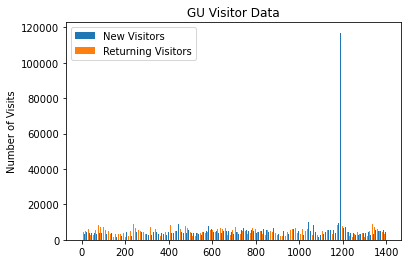

In [242]:
labels = dates
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, new_visitors, width, label="New Visitors")
rects2 = ax.bar(x + width/2, returning_visitors, width, label="Returning Visitors")
ax.set_title("GU Visitor Data")

ax.set_ylabel("Number of Visits")
ax.legend()

plt.show()

From this data, we can conclude that there was a spike of visits which is arond march madness!